In [ ]:
import pandas as pd
df=pd.read_csv('/kaggle/input/amazon-review/K8 Reviews v0.2.csv')
df.head()

### checking the labels of data set(for +ive review=1, for negative review=0)

In [42]:
df.head(50)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...
6,1,"Phone is awesome. But while charging, it heats..."
7,0,The battery level has worn down
8,0,It's over hitting problems...and phone hanging...
9,0,A lot of glitches dont buy this thing better g...


## Prepairing dataset

In [2]:
df.isnull().sum()

sentiment    0
review       0
dtype: int64

In [3]:
df.value_counts().count()

13036

<Axes: xlabel='sentiment'>

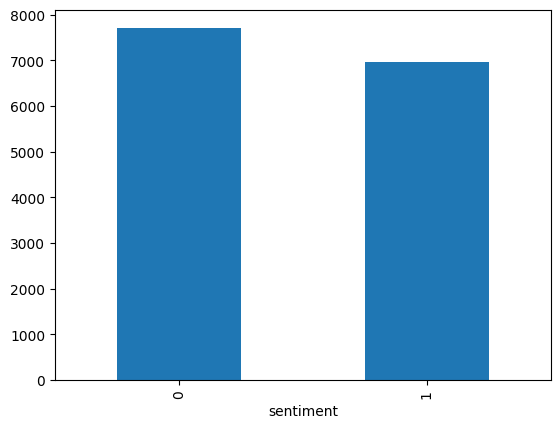

In [4]:
df['sentiment'].value_counts().plot(kind='bar')

In [5]:
len(df)

14675

In [6]:
df.duplicated().sum()

1639

In [7]:
df[df.duplicated]

,sentiment,review
93,1,Good
121,1,Nice
137,1,Great phone
161,1,Good
193,1,Very good
...,...,...
14634,0,Good
14645,1,Nice product
14646,0,Not good
14661,0,Good


In [8]:
df[df.duplicated(keep=False)]

,sentiment,review
3,1,Good
10,0,Wrost
19,1,Good smartphone
20,1,good
46,0,Poor
...,...,...
14634,0,Good
14645,1,Nice product
14646,0,Not good
14661,0,Good


## Droping duplicate values

In [9]:
df.drop_duplicates(inplace=True)
len(df)

13036

# Model

In [10]:
from transformers import BertTokenizer


In [11]:
!pip install bert-for-tf2
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30509 sha256=e3bab465dd2578c258b2a76444189553a982d091977fe6d7755322f37e314395
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19455 sha256=940be943423781be7f91126fa644300093b54c16561c81b5f53f40274ffb6d0c
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7892 sha256=89f0811484d897d020614a1d835db52511ef258d13a6d95ad06197fde5e45627
  Stored in directory: /root/.cache/pip/wheels/69/c8/b3/92666cff9fb312bc3473eaa6b396695b89a7b3e31e908768

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Prepare data for NLP

In [13]:
seq_length=200
tokens=tokenizer(df['review'].tolist(),
                max_length=seq_length,
                truncation=True,
                padding='max_length',
                add_special_tokens=True,
                return_tensors='np')

In [14]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [15]:
tokens.input_ids

array([[  101,  2750,  1133, ...,     0,     0,     0],
       [  101, 25120,  5093, ...,     0,     0,     0],
       [  101,  1165,   146, ...,     0,     0,     0],
       ...,
       [  101,   138, 14291, ...,     0,     0,     0],
       [  101,  1188,  2179, ...,     0,     0,     0],
       [  101,  2750,  3317, ...,     0,     0,     0]])

In [16]:
tokens.attention_mask

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [17]:
arr=df['sentiment'].values
arr

array([1, 0, 1, ..., 1, 1, 1])

In [18]:
arr.shape

(13036,)

In [19]:
arr.max()

1

In [20]:
num_samples=len(df)
import numpy as np
arr=df['sentiment'].values
labels = np.zeros((num_samples, arr.max()+1))
labels[np.arange(num_samples), arr] = 1

In [21]:
labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [22]:
df_ids = tokens['input_ids']
df_mask = tokens['attention_mask']

In [23]:
df_ids.shape

(13036, 200)

## Making dataset for NLP

In [24]:
import tensorflow as tf
dataset=tf.data.Dataset.from_tensor_slices((df_ids,df_mask,labels))
dataset.take(1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<_TakeDataset element_spec=(TensorSpec(shape=(200,), dtype=tf.int64, name=None), TensorSpec(shape=(200,), dtype=tf.int64, name=None), TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [25]:

def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids,
           'attention_mask': masks}, labels

In [26]:

dataset = dataset.map(map_func)

In [27]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(200,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(200,), dtype=tf.int64, name=None)}, TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [28]:
batch_size=16

In [29]:
dataset=dataset.shuffle(10000).batch(batch_size,drop_remainder=True)

In [30]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 200), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 200), dtype=tf.int64, name=None)}, TensorSpec(shape=(16, 2), dtype=tf.float64, name=None))>

## Train test split

In [31]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    
    return train_ds, val_ds,

In [32]:
train_ds, val_ds = get_dataset_partitions_tf(dataset)

In [33]:
print(len(train_ds))
print(len(val_ds))

651
162


In [34]:
train_ds.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 200), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 200), dtype=tf.int64, name=None)}, TensorSpec(shape=(16, 2), dtype=tf.float64, name=None))>

In [35]:
from transformers import TFAutoModel

## Using pretrained waits for bert-base-cased model

In [36]:
!wget https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-tf_model.h5

--2023-12-26 07:59:56--  https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-tf_model.h5
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.71.190, 52.217.169.224, 52.217.133.32, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.71.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 526681800 (502M) [binary/octet-stream]
Saving to: 'bert-base-cased-tf_model.h5'

bert-base-cased-tf_ 100%[===================>] 502.28M  14.7MB/s    in 54s     

2023-12-26 08:00:51 (9.22 MB/s) - 'bert-base-cased-tf_model.h5' saved [526681800/526681800]



In [37]:
input_ids = tf.keras.layers.Input(shape=(200,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(200,), name='attention_mask', dtype='int32')

bert = TFAutoModel.from_pretrained('bert-base-cased')
# transformer
embeddings = bert.bert(input_ids, attention_mask=mask)[1]

# classifier head
x = tf.keras.layers.Dense(1024, activation='relu')(embeddings)
y = tf.keras.layers.Dense(2, activation='softmax', name='outputs')(x)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

model = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/3
651/651 [==============================] - 324s 434ms/step - loss: 0.3473 - accuracy: 0.8504 - val_loss: 0.2290 - val_accuracy: 0.9140
Epoch 2/3
651/651 [==============================] - 268s 411ms/step - loss: 0.2580 - accuracy: 0.8975 - val_loss: 0.2087 - val_accuracy: 0.9217
Epoch 3/3
651/651 [==============================] - 267s 409ms/step - loss: 0.2103 - accuracy: 0.9197 - val_loss: 0.1530 - val_accuracy: 0.9448


## ploting the loss and accuracy obtained by the model

/tmp/ipykernel_42/1357672471.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


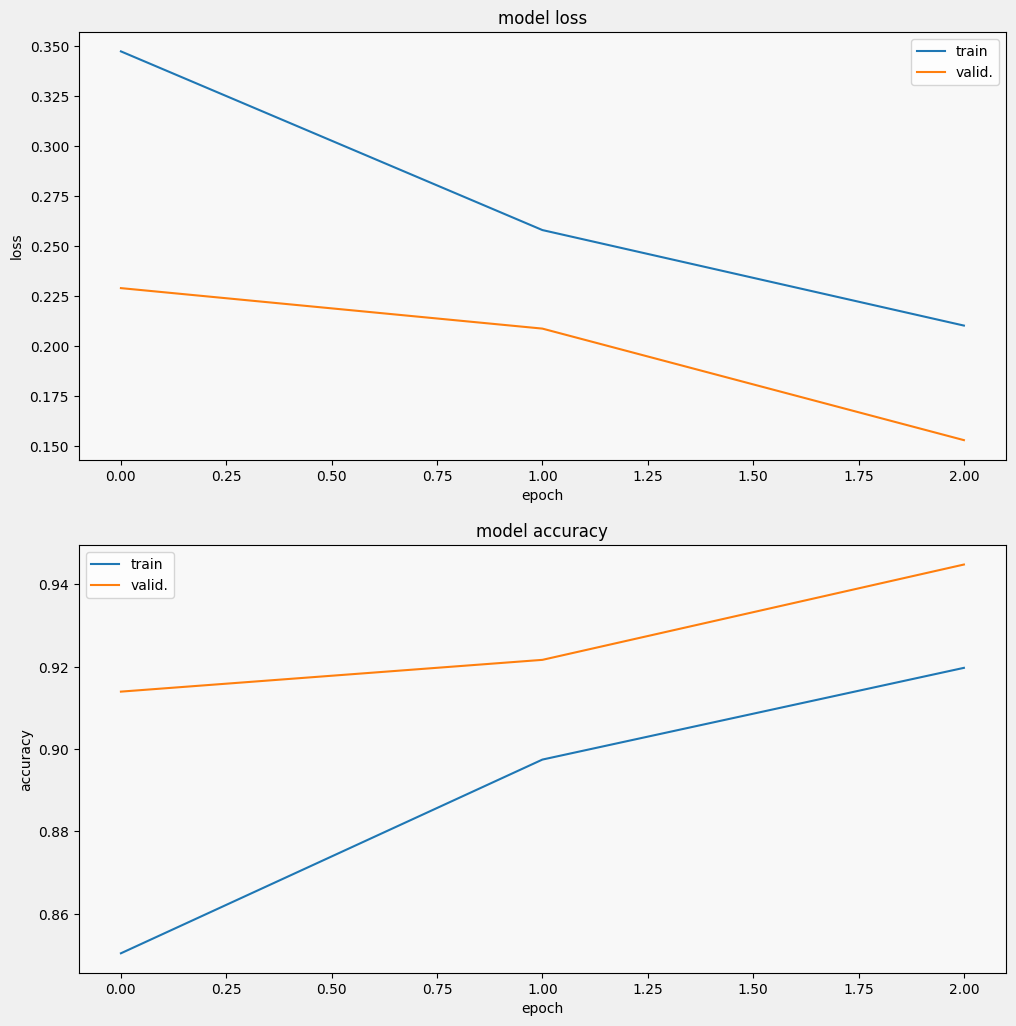

In [43]:
from matplotlib import pyplot as plt

def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])
display_training_curves(
    model.history['loss'],
    model.history['val_loss'],
    'loss'
)
display_training_curves(
    model.history['accuracy'],
    model.history['val_accuracy'],
    'accuracy'
)

## prediction

In [44]:
def prep_data(text):
    tokens = tokenizer.encode_plus(text, max_length=200,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_token_type_ids=False,
                                   return_tensors='tf')
    # tokenizer returns int32 tensors, we need to return float64, so we use tf.cast
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}


In [40]:
text=['Very good']
probs = model.predict(prep_data(text))[0]
print(probs)
np.argmax(probs)

1/1 [==============================] - 3s 3s/step
[0.14543599 0.854564  ]


1

### Model accuracy is 94% by means of that model is performing well. 